## SKETCH

1. All of the code below was produced via prompts to Perplexity.ai

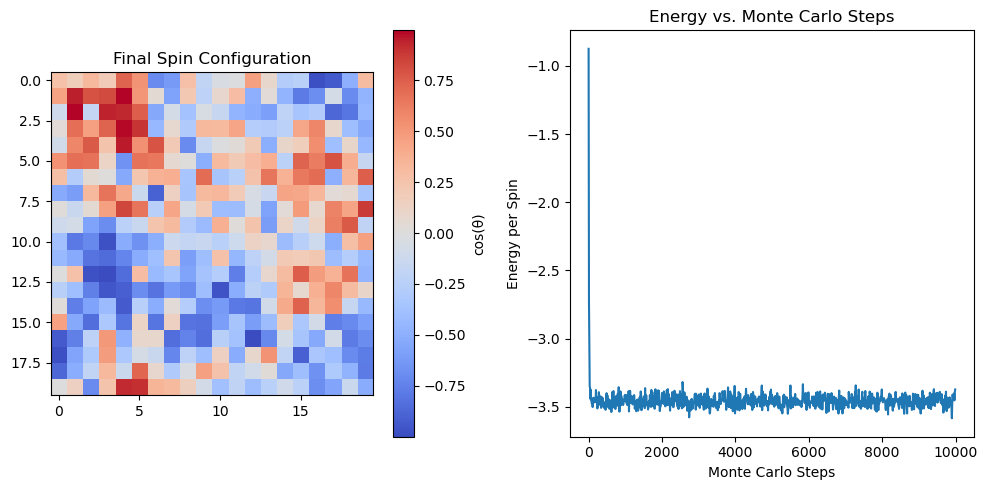

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the simulation parameters
L = 20  # Lattice size
N = L * L  # Total number of spins
J = 1.0  # Coupling constant
T = 0.5  # Temperature (in units where k_B = 1)
n_steps = 10000  # Number of Monte Carlo steps

# Initialize the lattice with random angles
lattice = np.random.uniform(0, 2*np.pi, (L, L))

# Define periodic boundary conditions
def periodic_bc(i, limit):
    return i % limit

# Calculate energy of a single spin
def energy(i, j):
    angle = lattice[i, j]
    neighbors = [
        lattice[periodic_bc(i-1, L), j],
        lattice[periodic_bc(i+1, L), j],
        lattice[i, periodic_bc(j-1, L)],
        lattice[i, periodic_bc(j+1, L)]
    ]
    return -J * sum(np.cos(angle - neighbor) for neighbor in neighbors)

# Metropolis algorithm
def metropolis_step():
    for _ in range(N):
        i, j = np.random.randint(0, L, 2)
        old_angle = lattice[i, j]
        old_energy = energy(i, j)
        
        # Propose a new angle
        new_angle = np.random.uniform(0, 2*np.pi)
        lattice[i, j] = new_angle
        new_energy = energy(i, j)
        
        # Accept or reject the move
        delta_E = new_energy - old_energy
        if delta_E > 0 and np.random.random() > np.exp(-delta_E / T):
            lattice[i, j] = old_angle  # Reject the move

# Run the simulation
energies = []
for step in range(n_steps):
    metropolis_step()
    if step % 10 == 0:  # Record energy every 10 steps
        total_energy = sum(energy(i, j) for i in range(L) for j in range(L))
        energies.append(total_energy / N)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(np.cos(lattice), cmap='coolwarm', interpolation='nearest')
plt.title('Final Spin Configuration')
plt.colorbar(label='cos(θ)')

plt.subplot(122)
plt.plot(range(0, n_steps, 10), energies)
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Energy per Spin')
plt.title('Energy vs. Monte Carlo Steps')

plt.tight_layout()
plt.show()


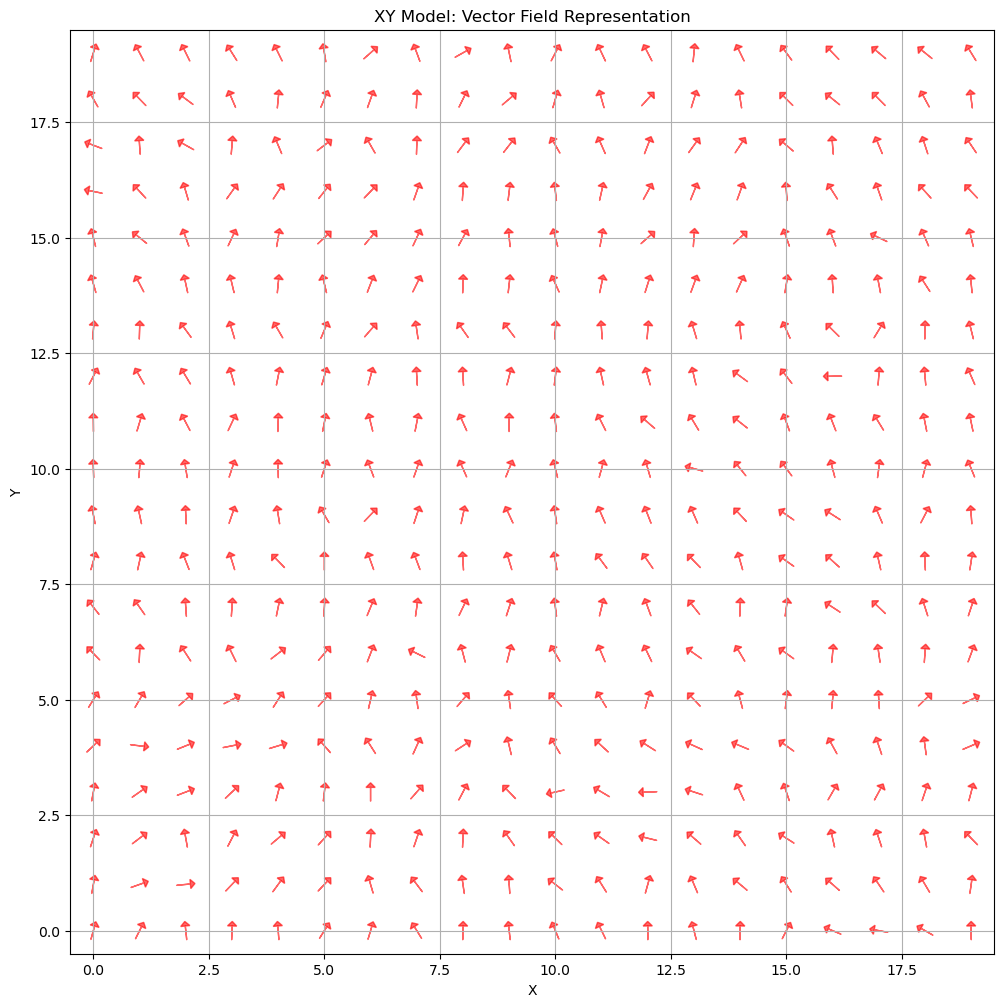

In [23]:
def plot_vector_field(lattice):
    L = lattice.shape[0]
    plt.figure(figsize=(12, 12))
    
    for i in range(L):
        for j in range(L):
            angle = lattice[i, j]
            dx = np.cos(angle) * 0.4  # Scale factor 0.4 for arrow length
            dy = np.sin(angle) * 0.4
            
            # Center the arrow on the grid point
            start_x = i - dx/2
            start_y = j - dy/2
            
            plt.arrow(start_x, start_y, dx, dy, head_width=0.2, head_length=0.1, 
                      fc='red', ec='red', alpha=0.6, length_includes_head=True)
    
    plt.xlim(-0.5, L-0.5)
    plt.ylim(-0.5, L-0.5)
    plt.title('XY Model: Vector Field Representation')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.show()

# Call the function to plot
plot_vector_field(lattice)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio

# Set up the simulation parameters
L = 40  # Lattice size
N = L * L  # Total number of spins
J = 1.0  # Coupling constant
T = .3  # Temperature (in units where k_B = 1)
n_steps = 1500  # Number of Monte Carlo steps
n_frames = 200  # Number of frames to save for the GIF

# Initialize the lattice with random angles
lattice = np.random.uniform(0, 2*np.pi, (L, L))

# Define periodic boundary conditions
def periodic_bc(i, limit):
    return i % limit

# Calculate energy of a single spin
def energy(i, j):
    angle = lattice[i, j]
    neighbors = [
        lattice[periodic_bc(i-1, L), j],
        lattice[periodic_bc(i+1, L), j],
        lattice[i, periodic_bc(j-1, L)],
        lattice[i, periodic_bc(j+1, L)]
    ]
    return -J * sum(np.cos(angle - neighbor) for neighbor in neighbors)

# Metropolis algorithm
def metropolis_step():
    for _ in range(N):
        i, j = np.random.randint(0, L, 2)
        old_angle = lattice[i, j]
        old_energy = energy(i, j)
        
        # Propose a new angle
        new_angle = np.random.uniform(0, 2*np.pi)
        lattice[i, j] = new_angle
        new_energy = energy(i, j)
        
        # Accept or reject the move
        delta_E = new_energy - old_energy
        if delta_E > 0 and np.random.random() > np.exp(-delta_E / T):
            lattice[i, j] = old_angle  # Reject the move


# Function to create a plot of the current lattice state
def plot_lattice(step):
    fig, ax = plt.subplots(figsize=(8, 8))
    # X, Y = np.meshgrid(range(L), range(L))
    # U = np.cos(lattice)
    # V = np.sin(lattice)
    # ax.quiver(X, Y, U, V, scale=25, scale_units='width', pivot='mid', headwidth=0, headlength=0)
    for i in range(L):
        for j in range(L):
            angle = lattice[i, j]
            dx = np.cos(angle) * 0.8  # Scale factor 0.4 for arrow length
            dy = np.sin(angle) * 0.8
            
            # Center the arrow on the grid point
            start_x = i - dx/2
            start_y = j - dy/2
            
            plt.arrow(start_x, start_y, dx, dy, head_width=0.2, head_length=0.1, 
                        fc='red', ec='red', alpha=0.6, length_includes_head=True)
    ax.set_xlim(-1, L)
    ax.set_ylim(-1, L)
    ax.set_title(f'XY Model: Monte Carlo Step {step}')
    ax.set_aspect('equal', adjustable='box')
    return fig

# Run the simulation and create frames
frames = []

for step in range(n_steps):
    metropolis_step()
    
    if step % (n_steps // n_frames) == 0:
        fig = plot_lattice(step)
        
        # Convert plot to image
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
        image = image[:,:,:3]  # Remove alpha channel
        frames.append(image)
        
        plt.close(fig)  # Close the figure to free up memory

# Save the frames as a GIF
# writer = PillowWriter(fps=20, loop=0)
# anim.save('xy_model_simulation.gif', writer=writer)
imageio.mimsave('xy_model_simulation.gif', frames, loop=0, fps=20)

